## <span style="color:blue">G112 Summary</span>

### <span style="color:#008891">Incidence of industrial pellets by location, amplitude and frequency</span>

Plastic industrial pellets or GPI have been found at all lakes in the present study. The quantity of pellets found and the frequency at which they are identified varies from one lake to another and from one location to another. 

Here we summarize the incidence of GPI nationally and regionally. We focus on the locations that have the geatest median value for GPI and the greatest frequency.

#### <span style="color:#008891">Discussion</span>

questions or comments: analyst@hammerdirt.ch

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import utilities.utility_functions as ut

# documenting
from IPython.display import Markdown as md

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

In [2]:
# the local file structure. The resources are located in the corresponding directory.
survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# variables/arrays that are frequently used:
# project lakes
the_lakes = [
    "Bielersee",
    "Walensee",
    "Lac Léman",
    "Zurichsee",
    "Neuenburgersee",
    "Thunersee",
    "Lago Maggiore",
    "Brienzersee",
    "poi"
]

the_rivs = [
    'Aare',
    'Rhône',
    'Limmat',
    'Linth',
    'Ticino',
]
# project beaches
poi = [
    "neuenburgersee_cudrefin_mattera",
    "la-petite-plage",
    "evole-plage",
    "plage-de-cheyres",
    "mullermatte",
    "bielersee_vinelz_fankhausers",
    "baby-plage-geneva",
    "baye-de-montreux-g",
    "grand-clos",
    "preverenges",
    "quai-maria-belgia",
    "zurichsee_wollishofen_langendorfm",
    "zurichsee_kusnachterhorn_thirkell-whitej",
    "zuerichsee_richterswil_benkoem_2",     
    "rastplatz-stampf",
    "weissenau-neuhaus",
    "thunersee_spiez_meierd_1",
    "walensee_walenstadt_wysse",
    "gasi-strand",
    "vira-gambarogno",
    "sentiero-giro-del-golf-spiaggia",
    "maladaire"
    
]

In [4]:
# standard formats already in use for charts 
# you can just apply these as kwargs to different elements...
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12}
title_k20 = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'dodgerblue'}
title_k17 = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'salmon'}
titler_k20 = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'dodgerblue'}
titler_k17 = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'salmon'}
xlab_k = {'labelpad':10, 'fontsize':12}
ylab_k = {'labelpad':14, 'fontsize':14}
titler_k = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12}

# use thes to format date axis in charts
weeks = mdates.WeekdayLocator(byweekday=1, interval=4)
days = mdates.DayLocator(bymonthday=1, interval=1)
months = mdates.MonthLocator(bymonth=[3,6,9,12])
wks_fmt = mdates.DateFormatter('%d')
mths_fmt = mdates.DateFormatter('%b')

In [5]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv(F"{survey_data}/results_with_zeroes_aggregated_parent.csv")
dfAgg = dfAgg[dfAgg.location != 'signalpain']
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# non aggregated survey data
dfSurveys = pd.read_csv(F"{survey_data}/results_with_zeroes.csv")
dfSurveys['date'] = pd.to_datetime(dfSurveys['date'])

# beach data
dfBeaches = pd.read_csv(F"{location_data}/beaches_pop_bfs.csv")
dfSurveys = dfSurveys[dfSurveys.location != 'signalpain']
dfBeaches = dfBeaches[dfBeaches.slug != 'signalpain']
dfBeaches.set_index('slug', inplace=True)

# code definitions
dfCodes = pd.read_csv(F"{code_defs}/mlw_codes.csv")

# geo date: explantory variables, index by slug and make a map:
dfStreets = pd.read_csv(F"{geo_data}/exp_variables/strts_1000m.csv", index_col='slug')['length']
dfBlds = pd.read_csv(F"{geo_data}/exp_variables/bldgs_500m.csv", index_col='slug')['area']
dfRivs = pd.read_csv(F"{geo_data}/exp_variables/rivs_1500m.csv", index_col='slug')['NUMPOINTS']

#### <span style="color:#008891">Location of project folder</span>

In [6]:
g112summary = ut.make_project_folder(output, 'g112Summary')
md(F"### The project directory is: ../{g112summary}")

That project exists


### The project directory is: ../output/g112Summary

### <span style="color:#008891">Industrial pellets: summary</span>

1. Locations where they have been found
2. Frequency of identification
3. Seasonal variation
4. Correlation tables
5. Median value per region

### <span style="color:#1e90ff">Method</span>

**<span style="color:#008891">Data source, time frame, geographic scope and collection methods </span>**

The data for this analysis is the results from beach-litter surveys conducted in Switzerland from April 1, 2020 through January 18, 2021.

All surveys that were conducted on Bielersee, Neuenburgersee, Thunersee, Walensee, Zurichsee, Lac Léman, Brienzersee and Lago Magiore were considered. 

The data was collected according to the protocol described here [https://www.plagespropres.ch/](https://www.plagespropres.ch/). In brief all visible data is collected along a beach within a measured distance from the waters edge. The width of the survey area depends on the terrain and the water level. The visible strand line or the nearest physical structure defines the width of a survey.

Surveys were conducted by the following organizations:

1. hammerdirt
2. Association pour le Sauvegarde du leman
3. Solid Waste Management Ecole Polytechnique Federal
4. Ecole International de Geneve
5. Precious plastic leman
6. Why isn't your association here?

This analysis is an open source document. The working note book is available in the repository located here [https://github.com/hammerdirt-analyst/iqals](https://github.com/hammerdirt-analyst/iqals). 

In [7]:
# set some parameters:
start_date = '2020-04-01'
end_date = dt.datetime.today().strftime('%Y-%m-%d')
code = 'G112'

# restrict to lakes only
dfS = dfAgg.loc[(dfAgg.water_name.isin(the_lakes))&(dfAgg.date >= start_date)].copy()

# map geo values to survey results:
dfS['population']=dfS.location.map(lambda x: dfBeaches.loc[x]['population'])
dfS['streets'] = dfS.location.map(lambda x: dfStreets.loc[x])
dfS['buildings'] = dfS.location.map(lambda x: dfBlds.loc[x])
dfS['rivs'] = dfS.location.map(lambda x: dfRivs.loc[x])

# seperate out the codes of interest
dfCode = dfS.loc[dfS.code == code].copy()

# daily totals for each group, index to date
allDf = dfS.groupby(['loc_date','location','water_name', 'date'], as_index=False).pcs_m.sum()
allDf.set_index('date', inplace=True)

g112Df = dfCode.groupby(['loc_date','location', 'water_name','date'], as_index=False).pcs_m.sum()
g112Df.set_index('date', inplace=True)

### <span style="color:#008891">Surveys location, infrastructure and population</span>

In [8]:
# locations with GPI
dfCode['wname_loc'] = tuple(zip(dfCode.water_name, dfCode.location))
qGpi = dfCode.groupby(['location', 'water_name'], as_index=False).quantity.sum()
noGpi = qGpi[qGpi.quantity == 0]
hasGpi = qGpi[qGpi.quantity > 0]
lakes_with = hasGpi[['water_name', 'location']].groupby(['water_name']).nunique('location')

print(F"\nNumber of locations {len(qGpi)}, number with: {len(hasGpi)}, without: {len(noGpi)}\n")
print(F"The number of locations on each lake with GPI:\n{lakes_with}")


Number of locations 73, number with: 34, without: 39

The number of locations on each lake with GPI:
                location
water_name              
Bielersee              5
Brienzersee            2
Lac Léman             12
Lago Maggiore          2
Neuenburgersee         3
Thunersee              2
Walensee               2
Zurichsee              6


In [9]:
# Frequency  
qGpiD = dfCode.groupby([ 'location', 'water_name','loc_date', 'date',], as_index=False).pcs_m.sum()
number_trys = len(qGpiD)
number_succ = sum(qGpiD.pcs_m == 0)
number_succx = len(qGpiD[qGpiD.pcs_m > 0])

print(F'does the number of succeses and fails add to total trys? {number_succ + number_succx == len(qGpiD)}')
print(F"ratio success: {number_succx/number_trys}")
print(F"ratio fail : {number_succ/number_trys}")

does the number of succeses and fails add to total trys? True
ratio success: 0.359504132231405
ratio fail : 0.640495867768595


### <span style="color:#008891">Survey results</span>

GPI have been identified on all lakes and 34 out of 73 survey locations. Out of the 242 surveys conducted 87 (~36%) reported at least one GPI. Compared to the total amount of objects found at each survey the range of GPI found is between less than 1% \(Thunersee, Lago Maggiore\) and 9% \(Lac Léman\) of the daily total.

Of the lakes with 20 samples or more Bielersee has the highest median and frequency of all the project lakes. Lac Léman has the highest average value as well as greatest number of locations with at least one GPI. Brienzersee, with only 4 samples, leads all project lakes except in mean pcs/m.

**<span style="color:#008891">survey results summary</span>**

In [10]:
dtotal = allDf[['loc_date','water_name', 'pcs_m']].copy()
dtotal.set_index('loc_date', drop=True, inplace=True)
g112Dt = g112Df[['loc_date','water_name','pcs_m']].copy()
g112Dt.set_index('loc_date', drop=True, inplace=True)
survWith = g112Dt[g112Dt.pcs_m > 0].groupby('water_name').count()
g112Df['p_total'] = g112Df.loc_date.map(lambda x: g112Dt.loc[x].pcs_m/dtotal.loc[x].pcs_m)

In [11]:
regional_summary = g112Df.groupby('water_name').agg({'loc_date':'count', 'location':'nunique', 'pcs_m':'median', 'p_total':'mean'})
rs_mean = g112Df.groupby('water_name').pcs_m.mean()
regional_summary['frequency'] = regional_summary.index.map(lambda x: survWith.loc[x].pcs_m/g112Df[g112Df.water_name == x].loc_date.nunique())
regional_summary['locations with'] = regional_summary.index.map(lambda x: lakes_with.loc[x].location)
regional_summary.rename(columns={'loc_date':'# samples',"locations with":"# with GPI",  'location':'# locations', "pcs_m":"median pcs/m","p_total":"% of daily total"}, inplace=True)
regional_summary['mean pcs/m'] = regional_summary.index.map(lambda x: rs_mean[x])
regional_summary = regional_summary[["# samples", "# locations", "# with GPI", "median pcs/m", "mean pcs/m", "% of daily total", "frequency"]]
regional_summary

,# samples,# locations,# with GPI,median pcs/m,mean pcs/m,% of daily total,frequency
water_name,,,,,,,
Bielersee,31,9,5,0.020,0.071613,0.019672,0.580645
Brienzersee,4,2,2,0.035,0.465000,0.092040,0.750000
Lac Léman,72,22,12,0.000,0.505139,0.038931,0.486111
Lago Maggiore,12,8,2,0.000,0.007500,0.001026,0.166667
Neuenburgersee,31,8,3,0.000,0.010645,0.011515,0.322581
Thunersee,25,7,2,0.000,0.002800,0.001289,0.120000
Walensee,24,8,2,0.000,0.012917,0.007718,0.250000
Zurichsee,43,9,6,0.000,0.028140,0.011374,0.232558


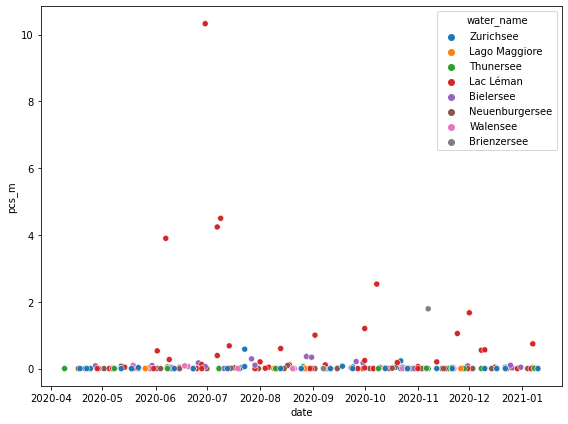

In [12]:
fig, axs = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(data=g112Df, x=g112Df.index, y='pcs_m', hue='water_name', ax=axs)
plt.tight_layout()
plt.show()

In [13]:
# export that data to  ouptut

rsfilename = F"{g112summary}/regional_summary_g112.csv"
g112rfilename = F"{g112summary}/survey_results_g112.csv"
allsfilename = F"{g112summary}/survey_results_daily_total.csv"

dfCode.to_csv(g112rfilename, index=False)
allDf.to_csv(allsfilename,index=False)
regional_summary.to_csv(rsfilename)

NameError: name 'project_directory' is not defined

#### Hopefully that just worked for you

if not contact analyst@hammerdirt.ch